# Pymaceuticals Inc.
---

### Analysis

In this challenge 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. Here are the conclusions made from this analysis:

During this study 51% of the mouse were male 49% female. This is a good distubution of data as it removes the bias with regards to sex.

Capomulin and Ramicane had the smallest tumor volume towards the end of treatment. 

Capomulin and Ramicane had the highest number of mouse tested with over 200 mouse tested.

There were no particular outliers with respect to tumor volume except for Infubinol with only one outlier.

Over time using Capomulin reduced the tumor volume.

Overall the heavier the mice the bigger the tumor volume is. 
 

In [1]:
# I have installed this module to have an interactive dataFrame

!pip install itables

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
df


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [3]:
unique_drugs=list(df["Drug Regimen"].unique())
unique_drugs

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [4]:
# Checking the number of mice.
len(list(df["Mouse ID"].unique()))

249

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
summary_df_dup = df.groupby(["Mouse ID", "Timepoint", "Drug Regimen"]).count().sort_values(by= "Sex", ascending=False) 
dup_ID = summary_df_dup[summary_df_dup["Sex"]>=2]

dup_ID=dup_ID.reset_index()
dup_ID_unique=dup_ID["Mouse ID"].unique()
dup_time_unique=dup_ID["Timepoint"].unique()
dup_drug_unique=dup_ID["Drug Regimen"].unique()
print(f"The duplicated mouse ID is: {dup_ID_unique}, at the duplicate timepoint of : {dup_time_unique}, using the dup drug of : {dup_drug_unique}")
dup_ID

The duplicated mouse ID is: ['g989'], at the duplicate timepoint of : [20 15 10  5  0], using the dup drug of : ['Propriva']


Mouse ID  Timepoint Drug Regimen  Sex  Age_months  Weight (g)  \
0     g989         20     Propriva    2           2           2   
1     g989         15     Propriva    2           2           2   
2     g989         10     Propriva    2           2           2   
3     g989          5     Propriva    2           2           2   
4     g989          0     Propriva    2           2           2   

   Tumor Volume (mm3)  Metastatic Sites  
0                   2                 2  
1                   2                 2  
2                   2                 2  
3                   2                 2  
4                   2                 2

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup=df[(df["Mouse ID"]==dup_ID_unique[0]) &\
          (df["Timepoint"].isin(dup_time_unique)) &\
          (df["Drug Regimen"].isin(dup_drug_unique))]
df_dup["dup?"] =1
df_dup


C:\Users\arupm\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  dup?  
908           45.000000                 0     1  
909           45.000000                 0     1  
910           48.786801                 0     1  
911           47.570392                 0     1  
912           51.745156                 0     1  
913           49.880528                 0     1  
914           51.325852                 1     1  
915           53.442020                 0     1  
916           55.326122                 1     1  
917           54.657650                 1     1

In [8]:
### adding a new column and marking the duplicate dvalues
columns=list(df.columns)
columns
df_dup_marked=pd.merge(df, df_dup,how="outer", on=columns)
df_dup_marked[df_dup_marked["Mouse ID"] =="g989"]
df_dup_marked

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1890     z969     Naftisol  Male           9          30         25   
1891     z969     Naftisol  Male           9          30         30   
1892     z969     Naftisol  Male           9          30         35   
1893     z969     Naftisol  Male           9          30         40   
1894     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  dup?  
0              45.000000                 0   NaN  
1              38.825898                 0   NaN  
2              35.014271                 1   NaN  
3              34.223992                 1   NaN  
4              32.997729                 1   NaN  
...                  ...               ...   ...  
1890           63.145652                 2   NaN  
1891           65.841013                 3   NaN  
1892           69.176246                 4   NaN  
1893           70.314904                 4   NaN  
1894           73.867845                 4   NaN  

[1895 rows x 9 columns]

In [9]:
## averaging the duplicate data
df_dup_summary = df_dup.groupby(["Mouse ID", "Timepoint","Drug Regimen", "Sex"]).mean().reset_index()
df_dup_summary

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     g989          0     Propriva  Female        21.0        26.0   
1     g989          5     Propriva  Female        21.0        26.0   
2     g989         10     Propriva  Female        21.0        26.0   
3     g989         15     Propriva  Female        21.0        26.0   
4     g989         20     Propriva  Female        21.0        26.0   

   Tumor Volume (mm3)  Metastatic Sites  dup?  
0           45.000000               0.0   1.0  
1           48.178597               0.0   1.0  
2           50.812842               0.0   1.0  
3           52.383936               0.5   1.0  
4           54.991886               1.0   1.0

In [10]:
# finding the non duplicated data to make it ready to merge to the average duplicate data
df_no_dup = df_dup_marked[df_dup_marked["dup?"]!=1]
df_no_dup

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1890     z969     Naftisol  Male           9          30         25   
1891     z969     Naftisol  Male           9          30         30   
1892     z969     Naftisol  Male           9          30         35   
1893     z969     Naftisol  Male           9          30         40   
1894     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  dup?  
0              45.000000                 0   NaN  
1              38.825898                 0   NaN  
2              35.014271                 1   NaN  
3              34.223992                 1   NaN  
4              32.997729                 1   NaN  
...                  ...               ...   ...  
1890           63.145652                 2   NaN  
1891           65.841013                 3   NaN  
1892           69.176246                 4   NaN  
1893           70.314904                 4   NaN  
1894           73.867845                 4   NaN  

[1883 rows x 9 columns]

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
### the proper method would have brrn to average the duplicate data and use it in the dataset.
# However since the requirment is to drop the duplicate mouse ID all at once . I'll so it here
clean_df= df[df["Mouse ID"]!=dup_ID_unique[0]]
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [12]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat=pd.DataFrame()
summary_stat ["Mean Tumor Volume"] = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

summary_stat ["Median Tumor Volume"] = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_stat ["Tumor Volume Variance"] = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_stat ["Tumor Volume std.Dev."] = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_stat ["Tumor Volume std.Err."] = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume std.Dev.  Tumor Volume std.Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby("Drug Regimen").agg(Mean_Tumor_Volume= ("Tumor Volume (mm3)", np.mean),
                                    Median_Tumor_Volume=("Tumor Volume (mm3)", np.median),
                                    Variance_Tumor_Volume=("Tumor Volume (mm3)", np.var),
                                    StdDev_Tumor_Volume=("Tumor Volume (mm3)", np.std),
                                    StdErr_Tumor_Volume=("Tumor Volume (mm3)", st.sem))

Mean_Tumor_Volume  Median_Tumor_Volume  Variance_Tumor_Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              StdDev_Tumor_Volume  StdErr_Tumor_Volume  
Drug Regimen                                            
Capomulin                4.994774             0.329346  
Ceftamin                 6.268188             0.469821  
Infubinol                6.567243             0.492236  
Ketapril                 8.279709             0.603860  
Naftisol                 8.134708             0.596466  
Placebo                  7.821003             0.581331  
Propriva                 6.622085             0.544332  
Ramicane                 4.846308             0.320955  
Stelasyn                 7.710419             0.573111  
Zoniferol                6.966589             0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of mice tested'>

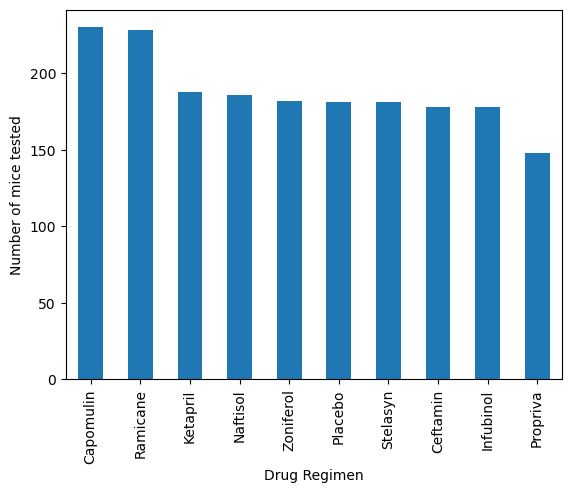

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_df_count= clean_df.groupby("Drug Regimen").agg(Count_timepoints = ("Timepoint" , np.size)).sort_values(by=["Count_timepoints"], ascending=False)
bar_df_count.plot(kind="bar", ylabel="Number of mice tested", legend=False)


([<matplotlib.axis.XTick at 0x1ede6a13ec8>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

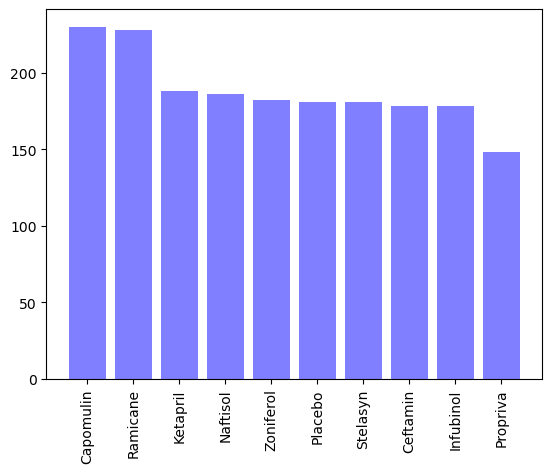

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_df_count_2=bar_df_count.reset_index()
bar_df_count_2
x= list(np.arange(0, len(bar_df_count_2["Drug Regimen"])))
y= list(bar_df_count_2["Count_timepoints"])
plt.bar (x, y, color='b', alpha=0.5, align="center")

plt.xticks(x, list(bar_df_count_2["Drug Regimen"]),rotation=90)

<AxesSubplot:ylabel='Mouse ID'>

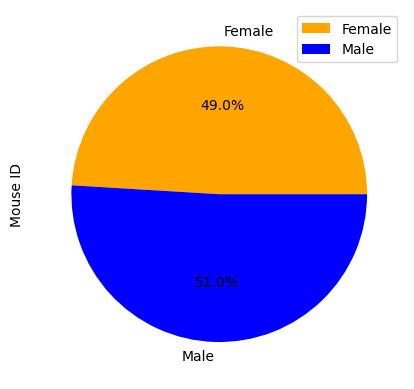

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
percentage_Sex= clean_df.groupby("Sex").count() ["Mouse ID"]/np.size(clean_df["Mouse ID"])*100
percentage_Sex=percentage_Sex.reset_index()
size=list(percentage_Sex["Mouse ID"])
labels=list(percentage_Sex["Sex"])
colors= ["orange", "blue"]

percentage_Sex.plot(kind="pie", y="Mouse ID", autopct='%1.1f%%', labels=labels, colors=colors )

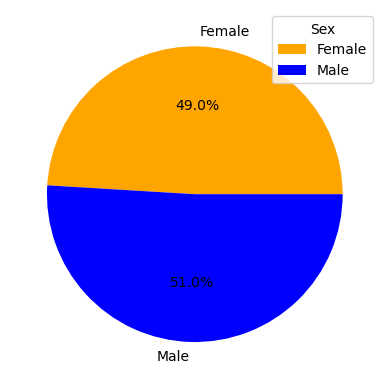

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie (size, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.legend(title = "Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
clean_df =clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_time= clean_df.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"].reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#final_df=pd.merge(clean_df,last_time, on=["Drug Regimen", "Timepoint"])
#final_df

final_df=pd.merge(clean_df, last_time, how="right")
final_df


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      b128    Capomulin  Female           9          22         45   
1      b742    Capomulin    Male           7          21         45   
2      f966    Capomulin    Male          16          17         20   
3      g288    Capomulin    Male           3          19         45   
4      g316    Capomulin  Female          22          22         45   
..      ...          ...     ...         ...         ...        ...   
95     s508     Ramicane    Male           1          17         45   
96     u196     Ramicane    Male          18          25         45   
97     w678     Ramicane  Female           5          24          5   
98     y449     Ramicane    Male          19          24         15   
99     z578     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633                 0  
2            30.485985                 0  
3            37.074024                 1  
4            40.159220                 2  
..                 ...               ...  
95           30.276232                 0  
96           40.667713                 3  
97           43.166373                 0  
98           44.183451                 0  
99           30.638696                 0  

[100 rows x 8 columns]

In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatment=list(final_df["Drug Regimen"]. unique())
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
d=pd.DataFrame()

for i in treatment:
    temp=final_df[final_df["Drug Regimen"]==i]
    y= temp["Tumor Volume (mm3)"]
    quartiles= y.quantile([0.25,0.5,0.75])
    quartile_df= pd.DataFrame(
        [
            {"Drug Regimen": i,
     "lowerq" : quartiles[0.25],
     "upperq" : quartiles[0.75],
     "iqr" : quartiles[0.75]-quartiles[0.25],
     "lower_bound" : quartiles[0.25] - (1.5*(quartiles[0.75]-quartiles[0.25])),
     "upper_bound" : quartiles[0.75] + (1.5*(quartiles[0.75]-quartiles[0.25]))}
        ]
    )

    d=pd.concat([d,quartile_df])
    
# Locate the rows which contain mice on each drug and get the tumor volumes
final_df_quartile= pd.merge(final_df, d, how="left", on="Drug Regimen")
   

final_df_quartile ["Outlier?"] = (final_df_quartile["Tumor Volume (mm3)"]>final_df_quartile["upper_bound"]) |\
                  (final_df_quartile["Tumor Volume (mm3)"]<final_df_quartile["lower_bound"])

outliers=final_df_quartile[final_df_quartile["Outlier?"]==True]
outliers    

print(f"The outlier is for drug {outliers.reset_index()['Drug Regimen'][0]} and is {outliers.reset_index()['Tumor Volume (mm3)'][0]} ")
final_df_quartile

The outlier is for drug Infubinol and is 36.3213458 


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      b128    Capomulin  Female           9          22         45   
1      b742    Capomulin    Male           7          21         45   
2      f966    Capomulin    Male          16          17         20   
3      g288    Capomulin    Male           3          19         45   
4      g316    Capomulin  Female          22          22         45   
..      ...          ...     ...         ...         ...        ...   
95     s508     Ramicane    Male           1          17         45   
96     u196     Ramicane    Male          18          25         45   
97     w678     Ramicane  Female           5          24          5   
98     y449     Ramicane    Male          19          24         15   
99     z578     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites     lowerq     upperq       iqr  \
0            38.982878                 2  32.377357  40.159220  7.781863   
1            38.939633                 0  32.377357  40.159220  7.781863   
2            30.485985                 0  32.377357  40.159220  7.781863   
3            37.074024                 1  32.377357  40.159220  7.781863   
4            40.159220                 2  32.377357  40.159220  7.781863   
..                 ...               ...        ...        ...       ...   
95           30.276232                 0  31.560470  40.659006  9.098537   
96           40.667713                 3  31.560470  40.659006  9.098537   
97           43.166373                 0  31.560470  40.659006  9.098537   
98           44.183451                 0  31.560470  40.659006  9.098537   
99           30.638696                 0  31.560470  40.659006  9.098537   

    lower_bound  upper_bound  Outlier?  
0     20.704562    51.832015     False  
1     20.704562    51.832015     False  
2     20.704562    51.832015     False  
3     20.704562    51.832015     False  
4     20.704562    51.832015     False  
..          ...          ...       ...  
95    17.912664    54.306811     False  
96    17.912664    54.306811     False  
97    17.912664    54.306811     False  
98    17.912664    54.306811     False  
99    17.912664    54.306811     False  

[100 rows x 14 columns]

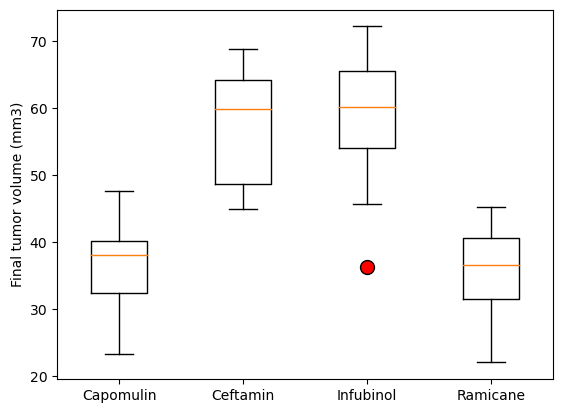

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_df=pd.DataFrame()
for i in treatment:
    temp=final_df_quartile[final_df_quartile["Drug Regimen"]==i]["Tumor Volume (mm3)"]
    
    temp=temp.reset_index(drop=True)
    boxplot_df[i]=temp
plt.boxplot(boxplot_df, labels=treatment,
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel(ylabel="Final tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
371     l509    Capomulin  Male          17          21          0   
372     l509    Capomulin  Male          17          21          5   
373     l509    Capomulin  Male          17          21         10   
374     l509    Capomulin  Male          17          21         15   
375     l509    Capomulin  Male          17          21         20   
376     l509    Capomulin  Male          17          21         25   
377     l509    Capomulin  Male          17          21         30   
378     l509    Capomulin  Male          17          21         35   
379     l509    Capomulin  Male          17          21         40   
380     l509    Capomulin  Male          17          21         45   

     Tumor Volume (mm3)  Metastatic Sites  
371           45.000000                 0  
372           45.851193                 0  
373           46.759074                 0  
374           47.488599                 1  
375           48.070452                 2  
376           44.006257                 2  
377           44.708055                 2  
378           40.207288                 2  
379           40.770813                 2  
380           41.483008                 3

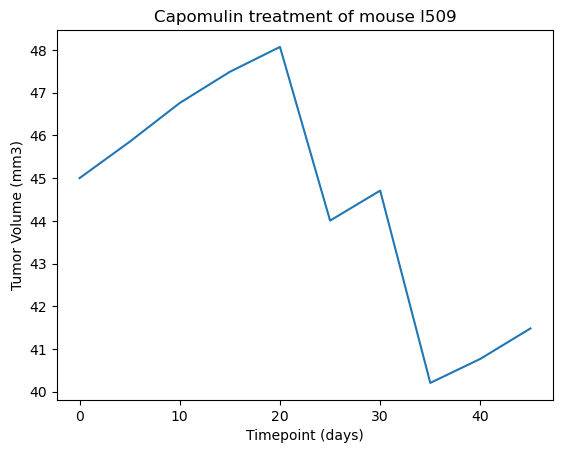

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot=clean_df[(clean_df["Mouse ID"]=="l509") & (clean_df["Drug Regimen"]=="Capomulin")]
plt.plot (lineplot["Timepoint"], lineplot["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
lineplot

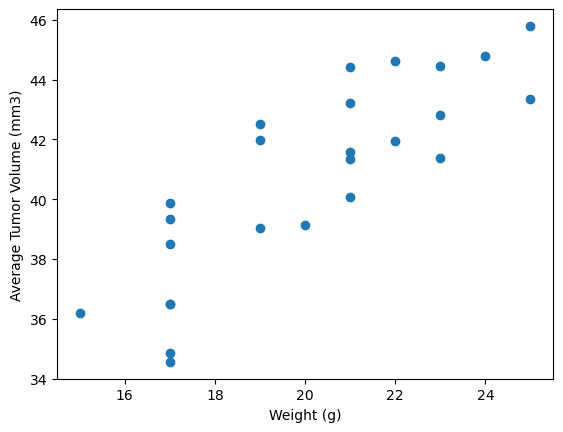

Mouse ID  avg tumor volume  Weight (g)
0      b128         41.963636        22.0
1      b742         40.083699        21.0
2      f966         36.505973        17.0
3      g288         41.990097        19.0
4      g316         44.613344        22.0
5      i557         44.805810        24.0
6      i738         39.141053        20.0
7      j119         44.465236        23.0
8      j246         43.216925        21.0
9      l509         44.434474        21.0
10     l897         42.507261        19.0
11     m601         34.847470        17.0
12     m957         39.049816        19.0
13     r157         45.798970        25.0
14     r554         36.509212        17.0
15     r944         43.367364        25.0
16     s185         34.559143        17.0
17     s710         42.803733        23.0
18     t565         39.328725        17.0
19     u364         39.887495        17.0
20     v923         41.581595        21.0
21     w150         41.384825        23.0
22     w914         41.352452        21.0
23     x401         36.182040        15.0
24     y793         38.506829        17.0

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterplot=pd.DataFrame()
filtered_df=clean_df[clean_df["Drug Regimen"]=="Capomulin"]
scatterplot["avg tumor volume"]=filtered_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
scatterplot["Weight (g)"]=filtered_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
scatterplot=scatterplot.reset_index()
scatterplot

plt.scatter(scatterplot["Weight (g)"],scatterplot["avg tumor volume"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
scatterplot

## Correlation and Regression

The correlation between mouse weight and its average tumor size is 0.84 and its p-value is 1.3225722434712404e-07


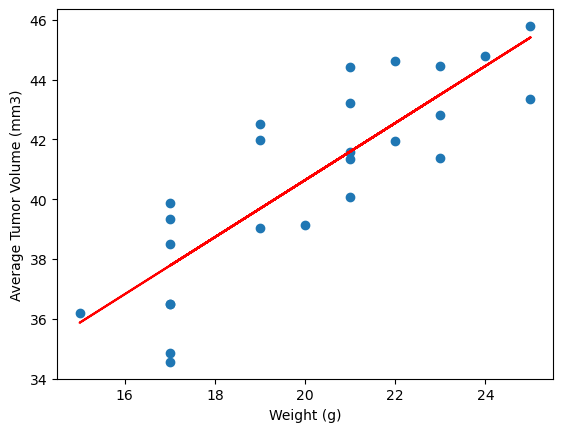

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatterplot["Weight (g)"],scatterplot["avg tumor volume"])
print(f"The correlation between mouse weight and its average tumor size is {round(rvalue,2)} and its p-value is {pvalue}")
regressionline=slope*scatterplot["Weight (g)"]+intercept

plt.scatter(scatterplot["Weight (g)"],scatterplot["avg tumor volume"] )
plt.plot(scatterplot["Weight (g)"],regressionline, c="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
